<a href="https://colab.research.google.com/github/rohitrmd/pytorch-fundamentals/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

Resources:


1.   Notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
2.   Book version: https://www.learnpytorch.io/01_pytorch_workflow/
3.   Question: https://github.com/mrdbourke/pytorch-deep-learning/discussions




In [1]:
what_we_are_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting mode to data (training)",
                        4: "make predictions and evaludate the model",
                        5: "saving and loading the model",
                        6: "putting it all together"
                        }

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting mode to data (training)',
 4: 'make predictions and evaludate the model',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contain all of PyTorch's building block
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparting and loading)

Data can be almost anything.. in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos
* DNA
* Audio
* Text

Machine learning i a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in numerical representation.

To showcase this, let's create some *known* data using linear regression.

We will use a linear regression to make a straight line using known parameters.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create a range of numbers

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # unsqueeze adds one extra dimension, see extra []
y = weight*X + bias
len(X), len(y)

(50, 50)

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data in training and in testing

Let's create a training and test data from our data



In [5]:
# Create a train and test split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(y_test), len(X_train), len(y_train)

(10, 10, 40, 40)

### How might we better visualize our data?

Data explorer's motto!
Visualize, Visualize, Visualize

In [6]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_labels, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

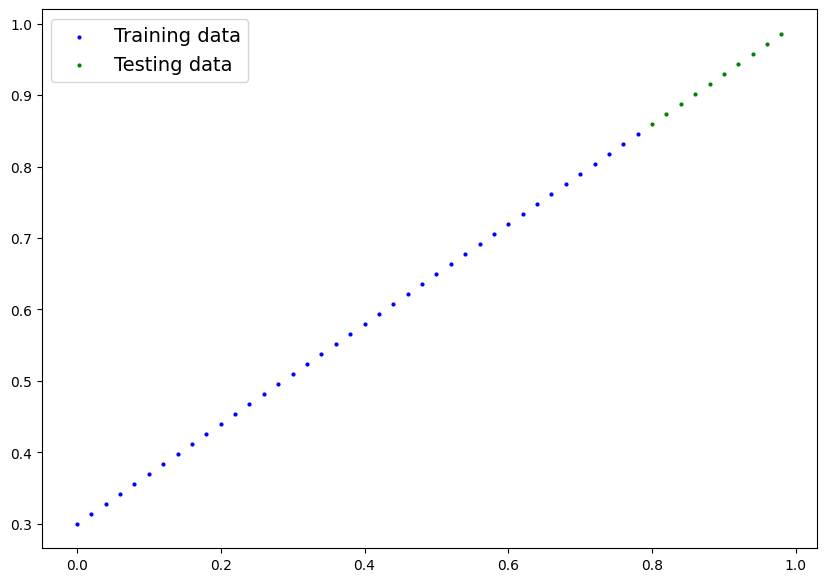

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!
Let's do it


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent the ideal values (the weight & bias values we use to create data)


How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropogation

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this i

### PyTorch model building essentials

* torch.nn - contains all buildings for computations graphs (neural network can be computational graph)
* torch.Parameter - what parameters should our model try and learn
*torch.nn.Module - The base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward()

In [9]:
### Checking contents of the model

# We can check what's inside the model using .parameters()

# Create a random seed
torch.manual_seed(42)

# Create an instance of the mode (this is subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making prediction susing `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts
When we pass data through our model, it's going to run through forward method

In [12]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

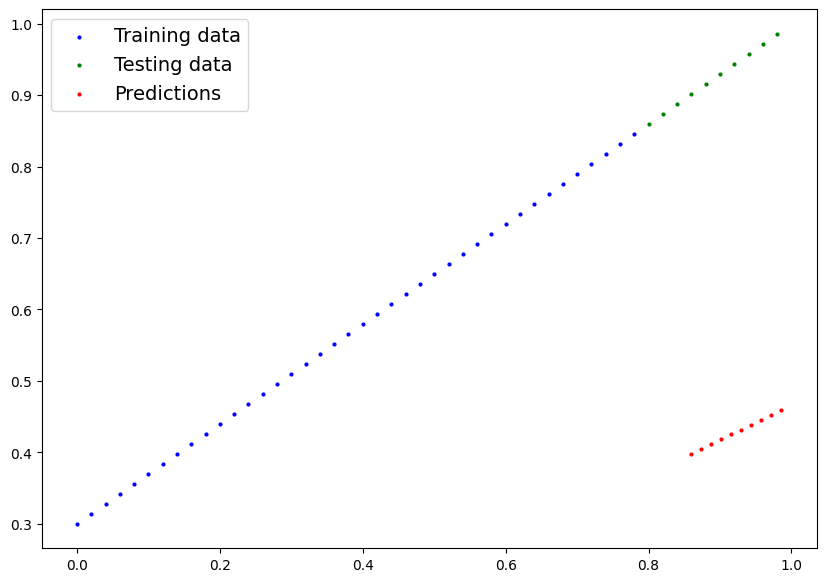

In [14]:
plot_predictions(predictions=y_preds)

### 3. Train the model
The whole idea of training is for a model to move from *unknown* parameters to some known parameters.
In other words, from poor representation of the data to a better representation of the data.
One way to measure predictions is to use a loss function.
*** Loss function *** : A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

***Opimizer***: Takes into account lost of a model and adjusts model's parameters.

We need:
1. Training loop
2. Testing loop

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup optimizer (stochastic gradient descent) - optimizer adjusts parameters to reduce loss
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possible the most important hyperparameter you can set



Q: Which loss function we should choose?
A:

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's forward() function  to make predictions on data - also called forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels
3. Optimize zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to reduce loss


In [17]:
# An epoch is one loop through the data... (this is hyperparameter as we have set it ourselves)
epochs = 200
torch.manual_seed(42)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  # print(f"loss:{loss}")

  # 3. Optimizer zero grad (they accumulate by default so need to be to zero)
  optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how optimizer changes will accumulate through the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns of gradient tracking and a couple of more settings
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [19]:
with torch.inference_mode():
  y_preds_now = model_0(X_test)


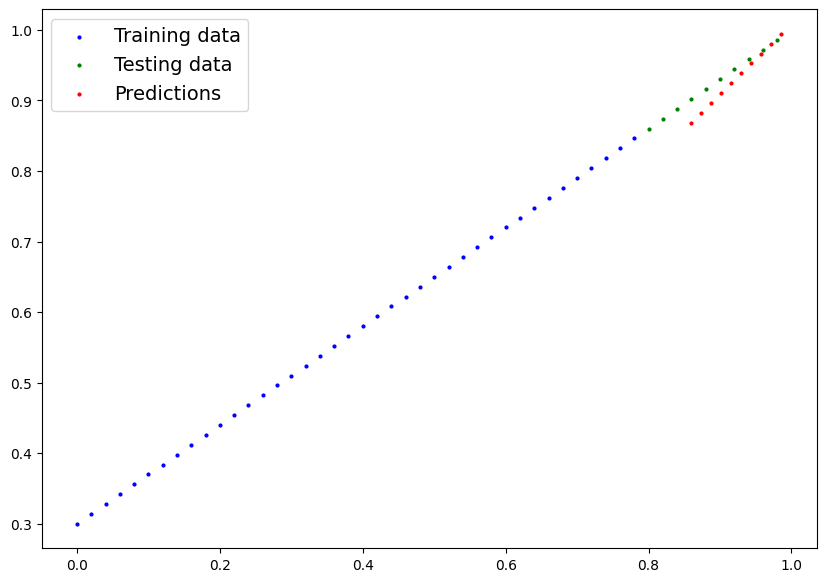

In [20]:
plot_predictions(predictions=y_preds_now)

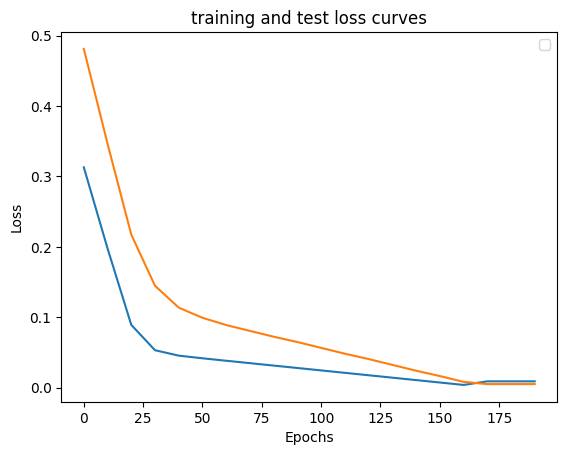

In [21]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend("")

### Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.
1. `torch.save()` - allows you to save model in pickle format - in python's way to serialize and deserialize the model
2. `torch.load()` - allows to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load model's saved state dictionary



In [22]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 Nov 20 02:27 01_pytorch_workflow_model_0.pth


### Loading a PyTorch model
Since we saved only state_dict, we need to create new instance of model class and load saved `state_dict() ` into that.

In [24]:
# To load in a saved state_dict, we have to instantiate  a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict into the instance
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
# Make same predictions with older model
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together


In [29]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

Create device agnostic code
This means if we've got access to GPU, our code will use it (for potentially faster computing).



In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [31]:
# Create some data using the linear regression formula of y = weight*X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

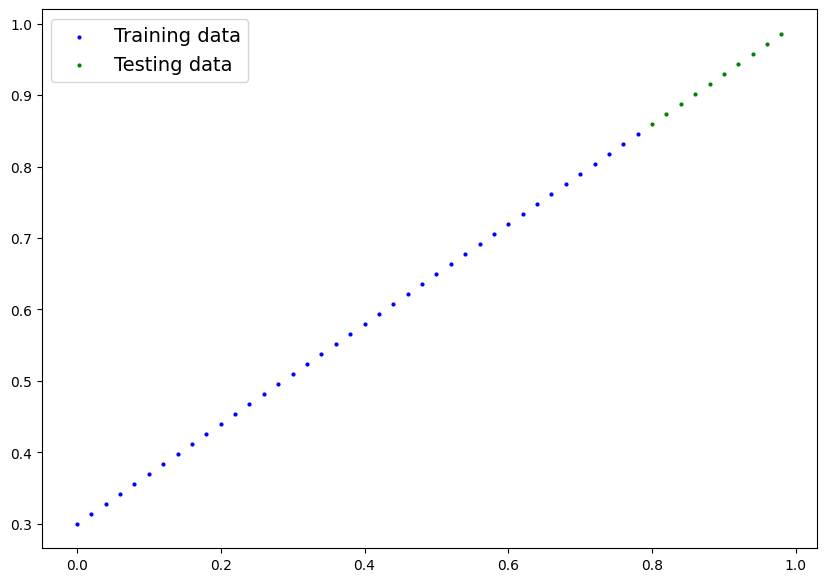

In [33]:
# Plot the data
# Note: if you don't have plot_predictions, this will error
plot_predictions()

### 6.2 Building a PyTorch linear model



In [34]:
 # Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module) :
  def __init__(self):
      super().__init__()
      # Use nn.Linear() for creating the model parameters / also called:
      # linear transform, probing layer
      self.linear_layer = nn.Linear(in_features=1,
                                    out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [35]:
# Set the model to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [36]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [37]:
# Setup loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)





In [38]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### 6.4 Making and evaluating predictions

In [40]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

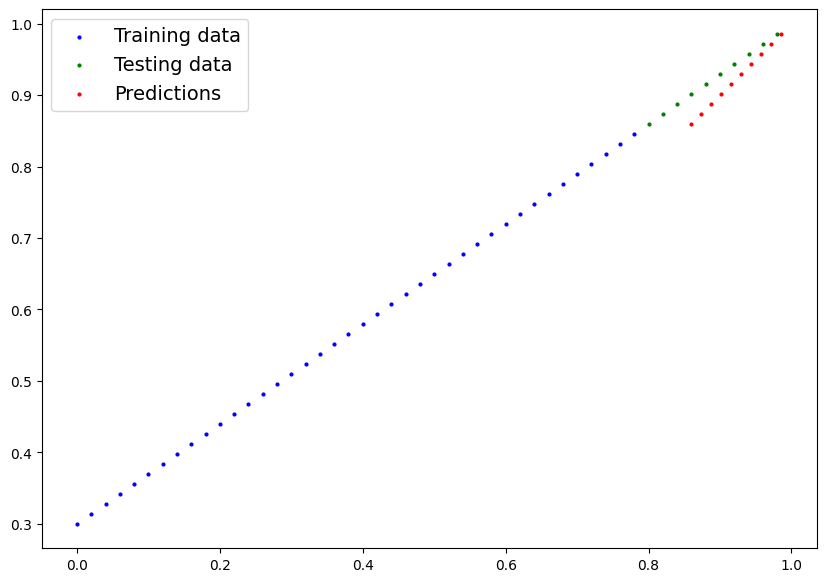

In [41]:
plot_predictions(predictions=y_preds)

### 6.5 Saving and loading a trained model

In [49]:
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [50]:
# Load a PyTorch

# Create a new instance of linear regression model
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [51]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [52]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [55]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])